# Testing

## Error in Software

Cost of failure 2017:

- US$1.7 trillion in financial losses
- 3.6 billion people affected

Some software errors have caused considerable material and human damage.

Watch the following video, Top Ten Most Disastrous Software Bugs: https://www.youtube.com/watch?v=AGI371ht1N8

How can we avoid bugs?

Is it possible to build software without errors?

- No software is ever 100% bug-free.
- Building software is an ongoing process.
- Normal day for any developer is:
    1. Write code for one hour.
    2. Spend the rest of the day to fix it.

**Type of Errors**
- Syntax Errors (easy to fix)
- Run Time errors (bugs): (only show after running the program.)

**Run Time Errors**

- Logic errors (mistake in software flow)
- Calculation errors
- Unit-level bugs
- System-level integration bugs (two or more pieces of software from separate subsystems interact erroneously.)


**Software Testing**

Pro|Cons
---|----
Bugs will often be found before the software is released. | It takes extra time to test the software.

You can either manually or automatically test yous software. 

Automated Tests**
What are the advantages and disadvantages?

Pro|Cons
---|----
Run quickly by a computer. | The testing scripts have to be written.
Fantastic return on investment. |
Write them once, then run them many, many times.| The test code has to be maintained.
Help you to maintain your application|
Test can help other developers to understand the program, thus can act as a kind of documentation.| You have to be precise when you write the test scripts

TDD (Test Driven Development)

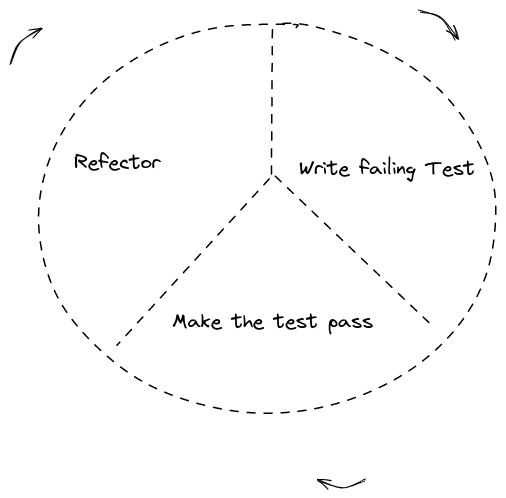

In [15]:
class CatController:
    def hourly_run(self, hour):
        if hour == 7:
            return 'Open cat cage.'
        elif hour in range(8, 12) or hour in range(13,20):
            return 'Give water.'
        return ''
        

Unit Test
- Test for a single unit (functions, methods)

In [16]:
WATER_HOURS = [8,9,10,11,13,14,15,16,17,18,19]

def main():
    test_failed = False
    error_msg = ''

    cat_controller = CatController()

    for hour in range(24):
        if hour in WATER_HOURS:
            if not "Give water." in cat_controller.hourly_run(hour):
                test_failed = True
                error_msg = "Failed to give water."
        elif "Give water." in cat_controller.hourly_run(hour):
            test_failed = True
            error_msg = "Should not give water."


        if not "Open cat cage." in cat_controller.hourly_run(7):
            test_failed = True
            error_msg = "Failed to open cage."

    return 'All test run successfully.' if not test_failed else error_msg

main()


'All test run successfully.'

### Unit test framework
- to write more robust test we can also use the Python unit testing framework

In testing following terminology is used:
- Test Fixtures
- Test cases
- Test suite
- Test runners

**Fixtures**
In unit testing, you'll often need to execute a set of common instructions before and after running a test. 
These instructions could be resembled by objects that represents the configuration state of your app. 
These components are known as fixtures and are set up before a test and cleaned up after the test has finished.

**Test cases**
is the individual unit of testing. It checks for a specific response to a particular set of inputs.

**Test suite**
With a growing amount of test cases, the need for categorizing them increases as well. Test suites are collections of test cases.

**Test runners**
is a component which orchestrates the execution of tests and provides the outcome to the user.

The three most popular test runners are:

unittest
pytest
nose2

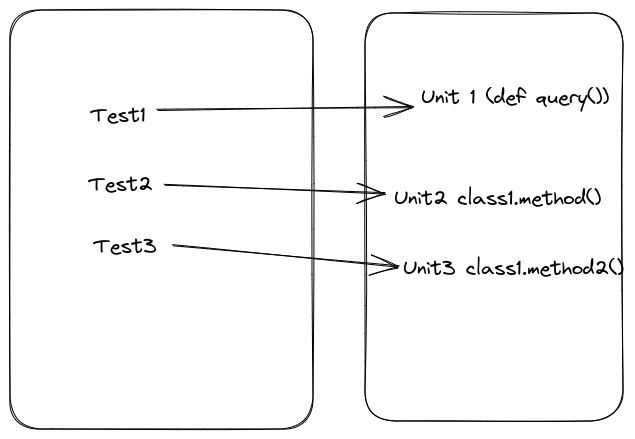

Suppose we are writing a currency app:
Aim:

1. 2 * 5USD ---> 10 USD
2. 2 * 10EUR --> 20 EUR

In [ ]:
import unittest

class TestMoney(unittest.TestCase):
    def test_multiplication(self):
        five = Dollars(5)
        tenner = five.times(2)
        # return True if 10 == tenner.amount else False
        self.assertEqual(10, tenner.amount)

unittest.main()

Running the code with a test runner:
- python3 -m unittest -v (looks for files starting with 'test_')
- python3 -m unittest test_money.py (runs test file)
- python3 -m unittest test_money (runs test as an module)
- python3 -m unittest test_money.TestMoney (runs this test case)
- python3 -m unittest test_money.TestMoney.test_multiplication_in_dollar (runs one test method of a test case)

- pytest -v
- pytest -v test_money.py 

**Run coverage**

- coverage run -m unittest
- coverage report -m

Assertions

<table>
<thead>
<tr><th>Method</th><th>Checks that</th></tr>
</thead>
<tbody>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-assertequal/">assertEqual(x,&nbsp;y, msg=None)</a></code></td>
<td><code>x&nbsp;==&nbsp;y</code></td></tr><tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-assertequal/">assertNotEqual(x,y,msg=None)</a></code></td><td><code>x&nbsp;!=&nbsp;y</code></td></tr>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-asserttrue/">assertTrue(x, msg=None)</a></code></td><td><code>bool(x)&nbsp;is&nbsp;True</code></td></tr>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-asserttrue/">assertFalse(x, msg=None)</a></code></td><td><code>bool(x)&nbsp;is&nbsp;False</code></td></tr>
</tbody></table>

Method|Checks that
---|---
assertIn(x, y, msg=None)| x in y
fail(msg=None)|forces test to Fail
pass | forces the test to pass
assertRaise(Error)|checks if error is raised

##  Context Managers and with Blocks

- Context Managers exists to control a with statement, just like iterators exists to control a for statement

classes of a context manager instance have two methods:
- __ enter__
- __ exit__

In [38]:
class MyContext:
    def __enter__(self):
        print('Enter context')
        return 'Hello World'

    def __exit__(self, exc_type, exc_value, traceback):
        print('Exit context')
        print('EXC_TYPE',exc_type)
        print(exc_value)
        print(traceback)
        if exc_type is AttributeError:
            print('Error handled gracefully')
            return True

In [39]:
with MyContext() as value:
    print('INSIDE CONTEXT')
    raise TypeError('Type error occurred')
    print('inside context', value)
print(value)

Enter context
INSIDE CONTEXT
Exit context
EXC_TYPE <class 'TypeError'>
Type error occurred
Hello World


In [87]:
class MyAssertionRaises:
    def __init__(self, error):
        self.error = error
        self.test_result = {'passed': True}

    def __enter__(self):
        return self.test_result

    def __exit__(self, exc_type, exc_value, traceback):
        print(traceback.tb_frame)
        if self.error == exc_type:
            return True
        else:
            self.test_result['passed'] = False

In [79]:
def func_to_test(text):
    if type(text) is not str:
        raise TypeError('Wrong type!')
    else:
        return text.upper()



In [86]:
overall_result = []
def test_func_to_test_raises_type_error():
    with MyAssertionRaises(TypeError) as result:
        func_to_test(1)  # 
    overall_result.append(result['passed'])

def test_upper():
    overall_result.append(func_to_test('bla') == 'BLA')

In [88]:
test_func_to_test_raises_type_error()
test_upper()
print('Test passed:',all(overall_result))

<frame at 0x7f1c38024aa0, file '/tmp/ipykernel_1340182/4162920709.py', line 3, code test_func_to_test_raises_type_error>
Test passed: True


In [ ]:
def func_true():
    return True

def test_true():
    assert func_true()

test_true()

### List of different Errors

<table class="table table-bordered ">
                <thead>
                    <tr>
                        <th>
                            Exception
                        </th>
                        <th>
                            Description
                        </th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>
                            AssertionError
                        </td>
                        <td>
                            Raised when the assert statement fails.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            AttributeError
                        </td>
                        <td>
                            Raised on the attribute assignment or reference fails.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            EOFError
                        </td>
                        <td>
                            Raised when the input() function hits the end-of-file condition.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ImportError
                        </td>
                        <td>
                            Raised when the imported module is not found.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            IndexError
                        </td>
                        <td>
                            Raised when the index of a sequence is out of range.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            KeyError
                        </td>
                        <td>
                            Raised when a key is not found in a dictionary.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            KeyboardInterrupt
                        </td>
                        <td>
                            Raised when the user hits the interrupt key (Ctrl+c or delete).
                        </td>
                    </tr>
                    <tr>
                        <td>
                            NameError
                        </td>
                        <td>
                            Raised when a variable is not found in the local or global scope.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            NotImplementedError
                        </td>
                        <td>
                            Raised by abstract methods.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            RuntimeError
                        </td>
                        <td>
                            Raised when an error does not fall under any other category.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            StopIteration
                        </td>
                        <td>
                            Raised by the next() function to indicate that there is no further item to be returned by the iterator.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SyntaxError
                        </td>
                        <td>
                            Raised by the parser when a syntax error is encountered.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            IndentationError
                        </td>
                        <td>
                            Raised when there is an incorrect indentation.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SystemError
                        </td>
                        <td>
                            Raised when the interpreter detects internal error.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SystemExit
                        </td>
                        <td>
                            Raised by the sys.exit() function.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            TypeError
                        </td>
                        <td>
                            Raised when a function or operation is applied to an object of an incorrect type.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            UnboundLocalError
                        </td>
                        <td>
                            Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ValueError
                        </td>
                        <td>
                            Raised when a function gets an argument of correct type but improper value.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ZeroDivisionError
                        </td>
                        <td>
                            Raised when the second operand of a division or module operation is zero.
                        </td>
                    </tr>
                </tbody>
            </table>

### Pytest

- pytest makes testing easier

## Mocking

A mock is a simulation of the object in the code that is being tested. It is simulated to allow
running tests against the object without incurring in unwanted side effects.


Suppose you want to test a function which deletes specific files:

- see MOCK_live folder

In [ ]:
# ./MOCK_live/delete.py
import os

def rm(filename):
    os.remove(filename)

In [ ]:
#
import unittest
import os
from delete import rm

class RmTestCase(unittest.TestCase):
    def test_rm(self):
        #create a file
        open('somefile.txt', 'a')
        #try to delete
        rm('somefile.txt')
        file_exists = os.path.isfile('./somefile.txt')
        self.assertFalse(file_exists, 'failed to remove the file')

Mocking with decorator (Version 1)

In [ ]:
import unittest
from unittest import mock
from delete import rm


class RmTestCase(unittest.TestCase):

    @mock.patch('delete.os')
    def test_rm(self, mock_os):
        #try to delete
        rm('somefile.txt')
        mock_os.remove.assert_called_with("somefile.txt")



At runtime, the *delete* module has its own **os** which is imported into its own local scope in the module. Thus, if we mock **os**, we won't see the effects of the mock in the *delete* module. 

### Mocking with context manager (Version 2)

In [ ]:
import unittest
from unittest import mock
from delete import rm


class RmTestCase(unittest.TestCase):

    def test_rm(self):
        with mock.patch('delete.os') as mock_os:
            rm('somefile.txt')
            mock_os.remove.assert_called_with("somefile.txt")

### Mocking without Test Class (Version3)

In [ ]:
from delete import rm 
from unittest import mock

@mock.patch('delete.os')
def test_rm(self):
    rm('foo')
    assert mock_os.remove.call_count == 1
    mock_os.remove.assert_called_with("somefile.txt")
    